In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv("zara.csv",sep=";")

In [7]:
df.head()

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,sku,name,description,price,currency,scraped_at,terms,section
0,185102,Aisle,No,Clothing,No,2823,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,272145190-250-2,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,19.99,USD,2024-02-19T08:50:05.654618,jackets,MAN
1,188771,Aisle,No,Clothing,No,654,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,324052738-800-46,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,169.00,USD,2024-02-19T08:50:06.590930,jackets,MAN
2,180176,End-cap,Yes,Clothing,Yes,2220,Zara,https://www.zara.com/us/en/slim-fit-suit-jacke...,335342680-800-44,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,129.00,USD,2024-02-19T08:50:07.301419,jackets,MAN
3,112917,Aisle,Yes,Clothing,Yes,1568,Zara,https://www.zara.com/us/en/stretch-suit-jacket...,328303236-420-44,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,129.00,USD,2024-02-19T08:50:07.882922,jackets,MAN
4,192936,End-cap,No,Clothing,Yes,2942,Zara,https://www.zara.com/us/en/double-faced-jacket...,312368260-800-2,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,139.00,USD,2024-02-19T08:50:08.453847,jackets,MAN


In [8]:
df.shape


(252, 16)

# Cleaning

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product ID        252 non-null    int64  
 1   Product Position  252 non-null    object 
 2   Promotion         252 non-null    object 
 3   Product Category  252 non-null    object 
 4   Seasonal          252 non-null    object 
 5   Sales Volume      252 non-null    int64  
 6   brand             252 non-null    object 
 7   url               252 non-null    object 
 8   sku               252 non-null    object 
 9   name              251 non-null    object 
 10  description       250 non-null    object 
 11  price             252 non-null    float64
 12  currency          252 non-null    object 
 13  scraped_at        252 non-null    object 
 14  terms             252 non-null    object 
 15  section           252 non-null    object 
dtypes: float64(1), int64(2), object(13)
memory u

In [10]:
df['scraped_at'] = pd.to_datetime(df['scraped_at'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Product ID        252 non-null    int64         
 1   Product Position  252 non-null    object        
 2   Promotion         252 non-null    object        
 3   Product Category  252 non-null    object        
 4   Seasonal          252 non-null    object        
 5   Sales Volume      252 non-null    int64         
 6   brand             252 non-null    object        
 7   url               252 non-null    object        
 8   sku               252 non-null    object        
 9   name              251 non-null    object        
 10  description       250 non-null    object        
 11  price             252 non-null    float64       
 12  currency          252 non-null    object        
 13  scraped_at        252 non-null    datetime64[ns]
 14  terms             252 non-

In [12]:
df.isnull().sum()

Product ID          0
Product Position    0
Promotion           0
Product Category    0
Seasonal            0
Sales Volume        0
brand               0
url                 0
sku                 0
name                1
description         2
price               0
currency            0
scraped_at          0
terms               0
section             0
dtype: int64

In [13]:
df.dropna(subset=['name', 'description'], inplace=True)

In [14]:
zara_palette = ['#4E4E4E', '#7E7E7E', '#A0A0A0', '#C5C5C5', '#E0E0E0']
neutral_palette = ['#A1887F', '#D7CCC8', '#8D6E63', '#4E342E', '#BCAAA4']
pastel_palette = ['#E0BBE4', '#957DAD', '#D291BC', '#FEC8D8', '#FFDFD3']

# 1.Product & Category Analysis

 <h3>1.How many products are available in each product terms?</h3>

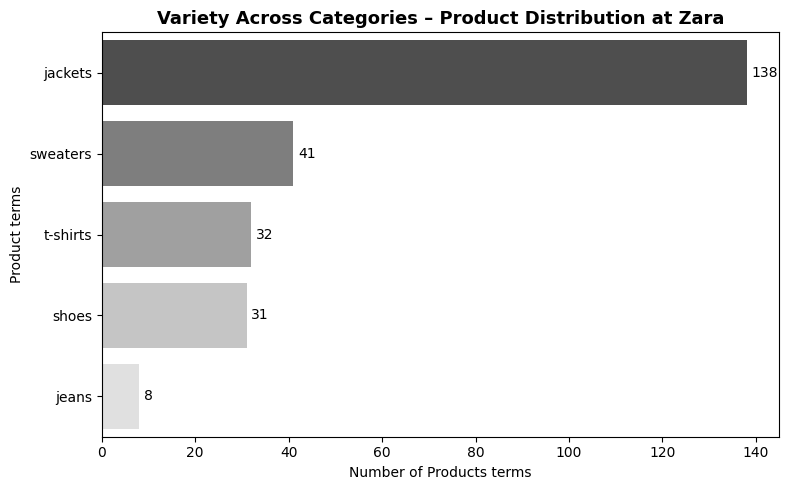

In [15]:
plt.figure(figsize=(8, 5))
gh=sns.countplot(data=df, y='terms', order=df['terms'].value_counts().index, palette=zara_palette)
plt.title("Variety Across Categories – Product Distribution at Zara", fontsize=13, fontweight='bold')
plt.xlabel("Number of Products terms")
plt.ylabel("Product terms")

for p in gh.patches:
    width = p.get_width()
    plt.text(width + 1, p.get_y() + p.get_height() / 2,
             int(width), ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.savefig("Product&Catewgory1.png", dpi=300, bbox_inches='tight')
plt.show()


Jackets dominate the product variety at Zara, making up the largest category with 138 items. Sweaters, t-shirts, and shoes have moderate variety, while jeans have the least number of options. This suggests Zara places a strong emphasis on jackets in its product lineup.

<h3>2. Average price of products in each category?</h3>

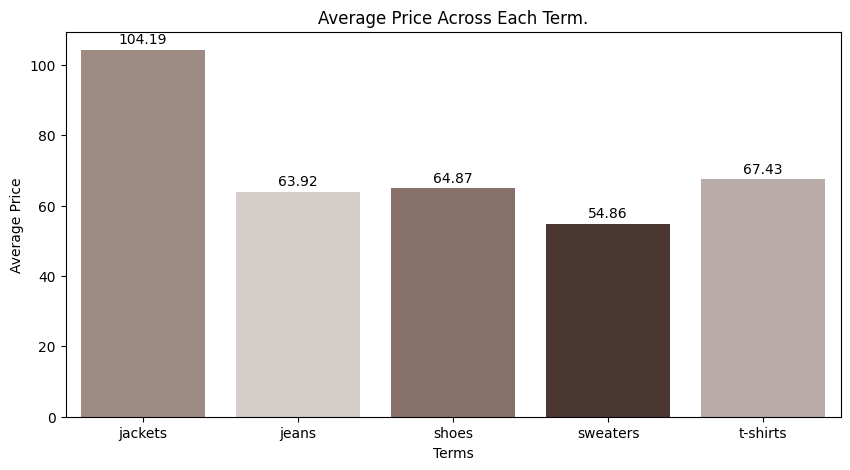

In [42]:
avgprice=df.groupby('terms')['price'].mean()
plt.figure(figsize=(10,5))
gh=sns.barplot(x=avgprice.index,y=avgprice.values,palette=neutral_palette)
plt.xlabel("Terms")
plt.ylabel("Average Price")
plt.title("Average Price Across Each Term.")

for bar in gh.patches:
    height = bar.get_height()
    gh.text(
        bar.get_x() + bar.get_width() / 2,  # x position
        height + 1,                         # y position (slightly above bar)
        f'{height:.2f}',                    # label format
        ha='center', va='bottom', fontsize=10
    )
plt.savefig("Product&Catewgory2.png", dpi=300, bbox_inches='tight')
plt.show()

Jackets have the highest average price, indicating a premium category, while sweaters are the most affordable. Other items like jeans, shoes, and t-shirts fall in a mid-price range.

<h3>3.Sales volume distribution by product category</h3>

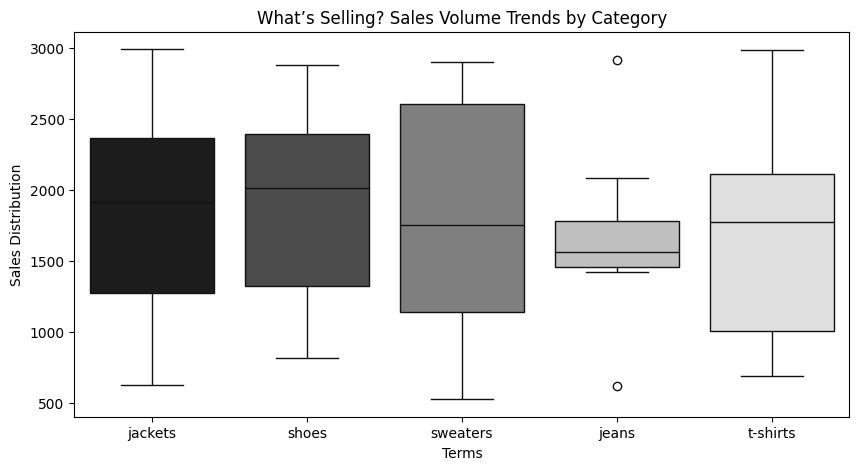

In [43]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x="terms",y="Sales Volume",palette=zara_palette)
plt.xlabel("Terms")
plt.ylabel("Sales Distribution")
plt.title("What’s Selling? Sales Volume Trends by Category")
plt.savefig("Product&Catewgory3.png", dpi=300, bbox_inches='tight')
plt.show()

The box plot illustrates sales volume trends by product category (jackets, shoes, sweaters, jeans, t-shirts). Sweaters have the highest median sales volume, around 2500 units, with a wide distribution. Jackets and shoes follow with medians around 2000 units, while t-shirts have a median near 2000 units with a narrower range. Jeans show the lowest median, below 1500 units, with an outlier at 3000 units. This suggests sweaters are the top-selling category, while jeans lag behind.

 <h3>4.Product distribution across sections (MEN, WOMEN, KIDS, etc.)</h3>

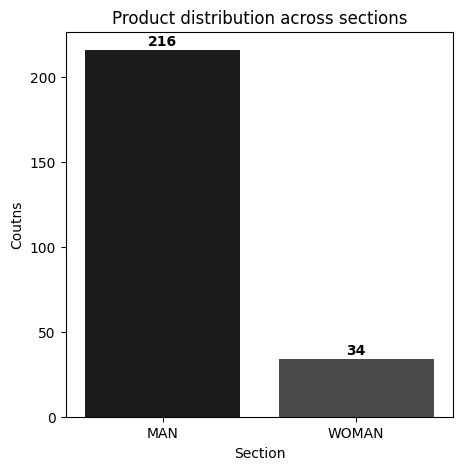

In [44]:
section_count=df['section'].value_counts()
plt.figure(figsize=(5,5))
gh=sns.barplot(x=section_count.index,y=section_count.values,palette=zara_palette)
plt.xlabel("Section")
plt.ylabel("Coutns")
plt.title("Product distribution across sections")
for i, v in enumerate(section_count.values):
    gh.text(i, v + 1, str(v), ha='center', va='bottom', fontweight='bold')
plt.savefig("Product&Catewgory4.png", dpi=300, bbox_inches='tight')
plt.show()


The bar chart shows the product distribution across sections, with the MAN section having 216 products and the WOMAN section having 34 products. This indicates a significantly higher concentration of products in the MAN section compared to the WOMAN section.

# 2.  Pricing & Sales Performance 

<h3>1.Relationship between product price and sales volume</h3>

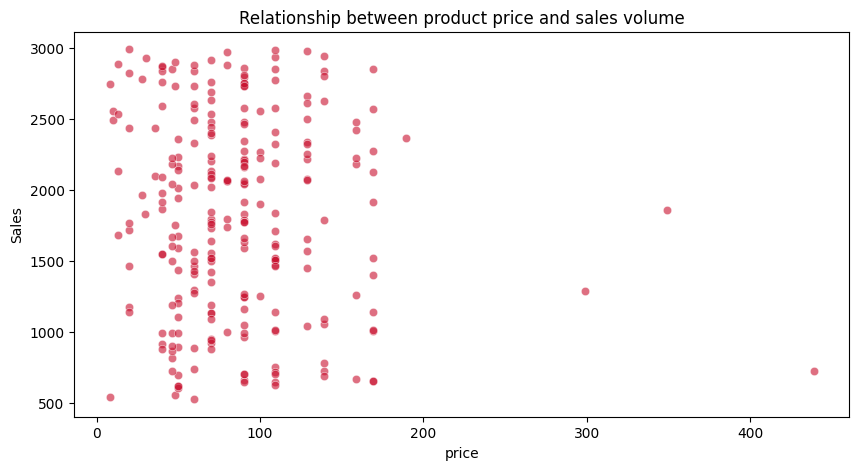

In [45]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df,x="price",y="Sales Volume",color='#C8102E',alpha=0.6)
plt.title("Relationship between product price and sales volume")
plt.xlabel("price")
plt.ylabel("Sales")
plt.savefig("Price&Sales1.png", dpi=300, bbox_inches='tight')
plt.show()

There is no clear correlation between product price and sales volume — high sales occur across a wide range of prices, but most high-volume sales are concentrated among lower to mid-priced items.

The scatter plot illustrates the relationship between product price and sales volume. Most data points cluster at prices below $150, with sales volumes ranging widely from 500 to 3000 units. As prices increase beyond $150, sales volumes tend to decrease, with fewer products sold above 2000 units. Outliers exist at higher prices (up to $400), but overall, there’s a weak negative correlation, suggesting that higher prices are associated with lower sales volumes.

<h3>2.Average sales volume per price range</h3>

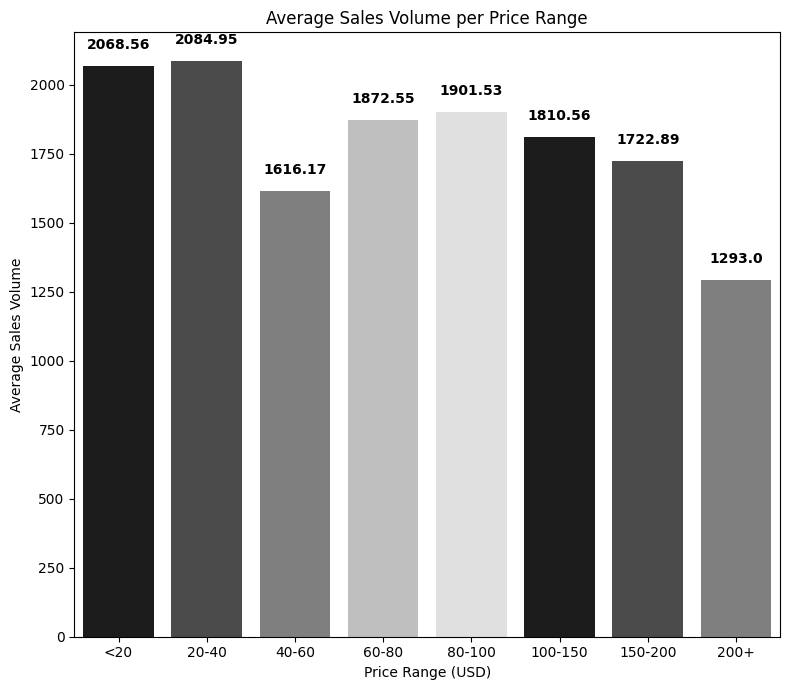

In [46]:
# Create price bins
bins = [0, 20, 40, 60, 80, 100, 150, 200, df['price'].max()+1]
labels = ['<20', '20-40', '40-60', '60-80', '80-100', '100-150', '150-200', '200+']
df['Price Range'] = pd.cut(df['price'], bins=bins, labels=labels, right=False)

# Group by price range and calculate average sales volume
avg_sales_by_price = df.groupby('Price Range')['Sales Volume'].mean().round(2)

# Plot
plt.figure(figsize=(8,7))
sns.barplot(x=avg_sales_by_price.index, y=avg_sales_by_price.values, palette=zara_palette)
plt.title("Average Sales Volume per Price Range")
plt.xlabel("Price Range (USD)")
plt.ylabel("Average Sales Volume")


# Add values on top of bars
for i, v in enumerate(avg_sales_by_price.values):
    plt.text(i, v + 50, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig("Price&Sales2.png", dpi=300, bbox_inches='tight')
plt.show()

The bar chart displays the average sales volume per price range (USD). The highest sales volumes occur in the lowest price ranges, with the <20 range at 2068.56 units and the 20-40 range at 2084.95 units. Sales volumes decrease as price increases, with the 40-60 range at 1616.17 units, 60-80 at 1872.55 units, 80-100 at 1901.53 units, 100-150 at 1810.56 units, 150-200 at 1722.89 units, and 200+ at 1293.0 units. This indicates that lower-priced products generally achieve higher sales volumes.

<h3>3.Sales volume comparison of promoted vs. non-promoted products</h3>

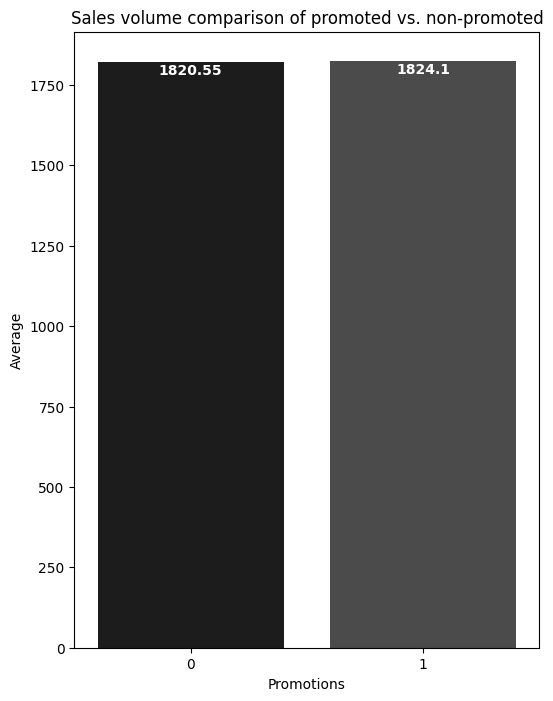

In [47]:
promotion_counts=df.groupby("Promotion")["Sales Volume"].mean().round(2)
plt.figure(figsize=(6,8))
gh=sns.barplot(x=promotion_counts.index,y=promotion_counts.values,palette=zara_palette)
plt.xlabel("Promotions")
plt.ylabel("Average")
plt.title("Sales volume comparison of promoted vs. non-promoted")

for i, value in enumerate(promotion_counts.values):
    gh.text(i, value - 5, str(value), ha='center', va='top', color='white', fontweight='bold')
plt.savefig("Price&Sales3.png", dpi=300, bbox_inches='tight')
plt.show()

The bar chart compares the average sales volume of promoted versus non-promoted products. Non-promoted products ("No") have an average sales volume of 1820.55 units, while promoted products ("Yes") show a slightly higher volume of 1824.10 units. This indicates that promotions have a minimal positive effect on sales volume, with only a marginal increase observed.

<h3>4.Correlation heatmap of numeric variables (Price, Sales Volume, Discounts, etc.) → Heatmap </h3>

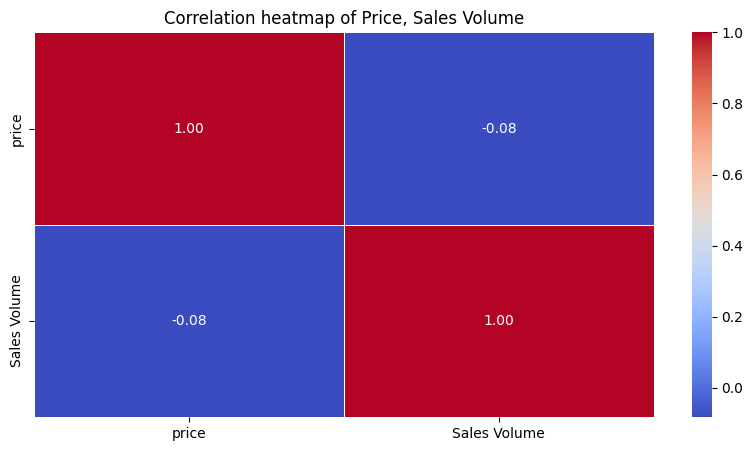

In [48]:
plt.figure(figsize=(10,5))
numeric_cols = ['price', 'Sales Volume']  
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation heatmap of Price, Sales Volume")
plt.savefig("Price&Sales4.png", dpi=300, bbox_inches='tight')
plt.show()


The correlation heatmap examines the relationship between price and sales volume. The correlation coefficient between price and sales volume is -0.08, indicating a very weak negative relationship. This suggests that changes in price have minimal impact on sales volume, with higher prices not significantly reducing sales, and lower prices not substantially increasing sales. The variables are largely independent of each other in this dataset.

<h3>5.Top 10 best-selling products by sales volume</h3>

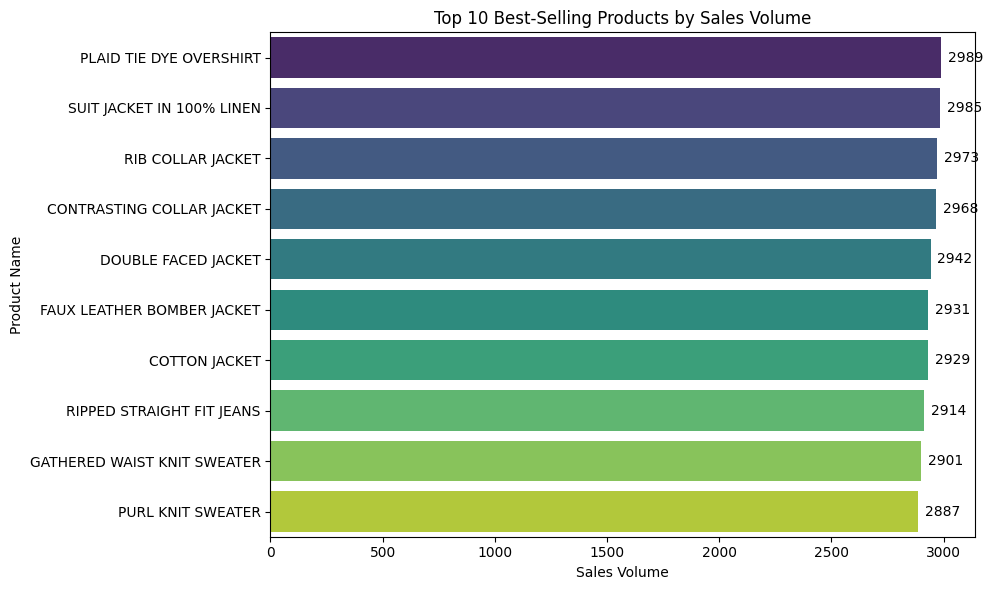

In [49]:
top_10_products = df.sort_values(by='Sales Volume', ascending=False).head(10)

plt.figure(figsize=(10, 6))
gh=sns.barplot(
    x='Sales Volume',
    y='name',
    data=top_10_products,
    palette='viridis'
)
for container in gh.containers:
    gh.bar_label(container, fmt='%.0f', label_type='edge', padding=5)
plt.title("Top 10 Best-Selling Products by Sales Volume")
plt.xlabel("Sales Volume")
plt.ylabel("Product Name")
plt.tight_layout()
plt.savefig("Price&Sales5.png", dpi=300, bbox_inches='tight')
plt.show()


The bar chart highlights the top 10 best-selling products by sales volume. The Plaid Tie Dye Overshirt leads with 2988 units, followed closely by the Suit Jacket in 100% Linen at 2985 units. Other notable performers include the Rib Collar Jacket (2973 units), Contrasting Collar Jacket (2968 units), and Purl Knit Sweater (2887 units). Sales volumes range from 2887 to 2988 units, indicating a highly competitive top tier with jackets and sweaters dominating the list.

 <h3>6.Effect of promotions on average price and sales</h3>

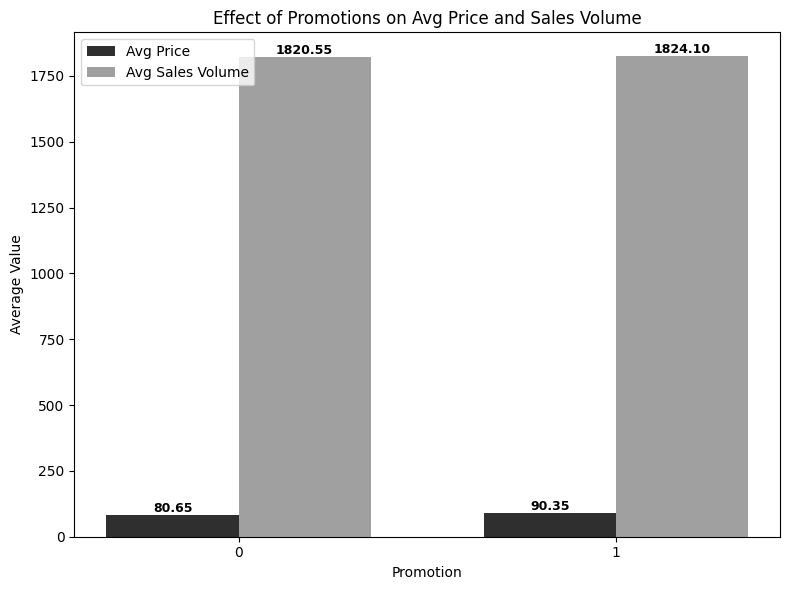

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Group by 'Promotion' and calculate average price and average sales volume
grouped = df.groupby('Promotion')[['price', 'Sales Volume']].mean().round(2)

# Set bar width and positions
bar_width = 0.35
labels = grouped.index.tolist()
x = np.arange(len(labels))

color_price = '#2f2f2f'        # deep gray (almost black)
color_sales = '#a0a0a0'  

# Create the plot
plt.figure(figsize=(8, 6))
bars1=plt.bar(x - bar_width/2, grouped['price'], width=bar_width, label='Avg Price', color=color_price)
bars2=plt.bar(x + bar_width/2, grouped['Sales Volume'], width=bar_width, label='Avg Sales Volume', color=color_sales)


# Add labels
plt.xticks(x, labels)
plt.xlabel('Promotion')
plt.ylabel('Average Value')
plt.title('Effect of Promotions on Avg Price and Sales Volume')
plt.legend()

for bar in bars1:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{bar.get_height():.2f}', 
             ha='center', va='bottom', color='black', fontsize=9, fontweight='bold')

for bar in bars2:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{bar.get_height():.2f}', 
             ha='center', va='bottom', color='black', fontsize=9, fontweight='bold')


plt.tight_layout()
plt.savefig("Price&Sales6.png", dpi=300, bbox_inches='tight')
plt.show()



The bar chart compares the effect of promotion on average price and sales volume. Non-promoted products ("No") have an average price of $80.65 and sales volume of 1820.55 units, while promoted products ("Yes") have a higher average price of $90.35 and slightly higher sales volume of 1824.10 units. This indicates that promotions lead to a modest increase in both price and sales, suggesting that promotional strategies may allow for higher pricing while maintaining or slightly boosting sales.

# 3. Product Positioning Analysis

<h3>1.Sales volume by product position and promotion status</h3>

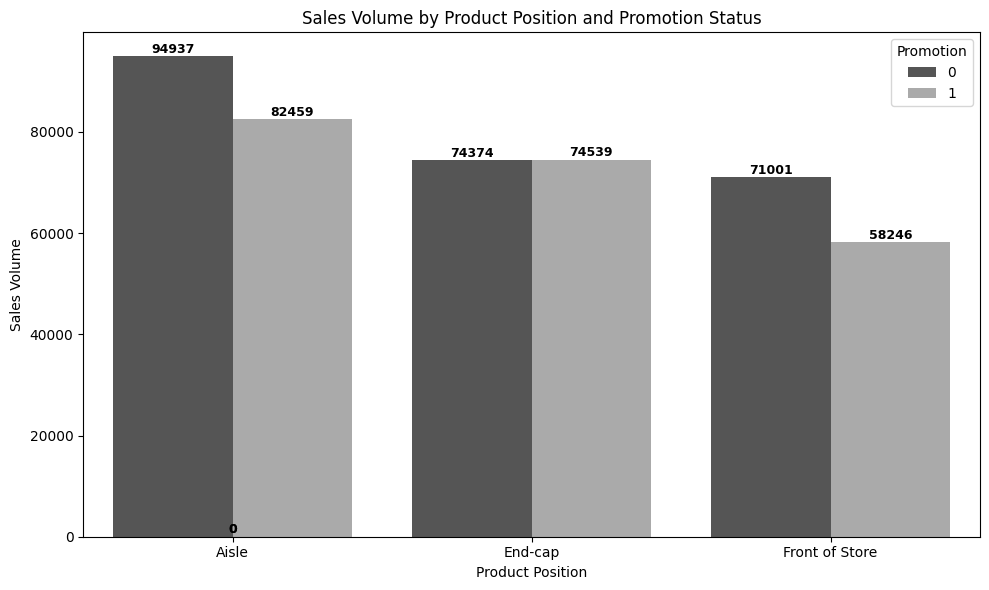

In [51]:

grouped = df.groupby(['Product Position', 'Promotion'])['Sales Volume'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))
gh= sns.barplot(
    data=grouped,
    x='Product Position',
    y='Sales Volume',
    hue='Promotion',
    palette='gray'  # You can replace with your zara_palette
)

for bar in gh.patches:
    height = bar.get_height()
    gh.text(
        bar.get_x() + bar.get_width() / 2,
        height + 50,  # Adjust padding as needed
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='bold',
        color='black'
    )
# Titles and labels
plt.title("Sales Volume by Product Position and Promotion Status")
plt.xlabel("Product Position")
plt.ylabel("Sales Volume")
plt.legend(title='Promotion')
plt.tight_layout()
plt.savefig("Productpositioning1.png", dpi=300, bbox_inches='tight')
plt.show()

The bar chart shows sales volume by product position (Aisle, End-cap, Front of Store) and promotion status. Aisle has the highest sales, with non-promoted products at 94,937 units and promoted at 82,459 units. End-cap follows with 74,374 (non-promoted) and 74,539 (promoted) units, showing similar performance. Front of Store records 71,001 (non-promoted) and 58,246 (promoted) units, indicating lower sales. Non-promoted products generally outperform promoted ones across all positions.

# 4.Promotion Impact Analysis

<h3>1.Number of promoted products vs. non-promoted products</h3>

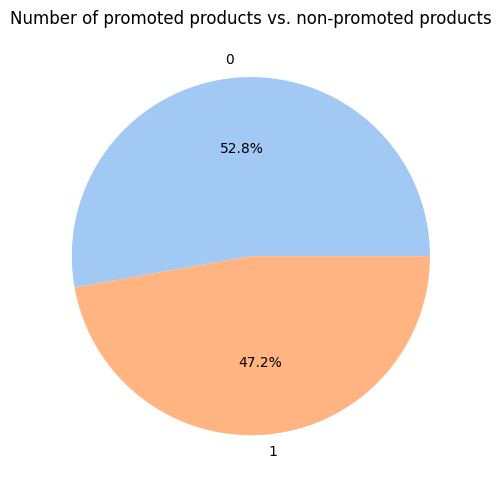

In [54]:
promotional=df["Promotion"].value_counts()
plt.figure(figsize=(10,5))
plt.pie(promotional,labels=promotion_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title("Number of promoted products vs. non-promoted products")
plt.tight_layout()
plt.savefig("PromotionImpact1.png", dpi=300, bbox_inches='tight')
plt.show()

The pie chart illustrates the distribution of promoted versus non-promoted products within the dataset. It reveals that 52.8% of the products are non-promoted ("No"), while 47.2% are promoted ("Yes"). This indicates a slight predominance of non-promoted products, suggesting that nearly half of the inventory benefits from promotional efforts, with a marginal lean towards non-promoted items. This distribution could imply a strategic focus on organic sales for a significant portion of the product line, potentially warranting further investigation into the effectiveness of promotional activities on sales performance.

<h3>2.Average sales volume by promotion status across categories2.</h3>

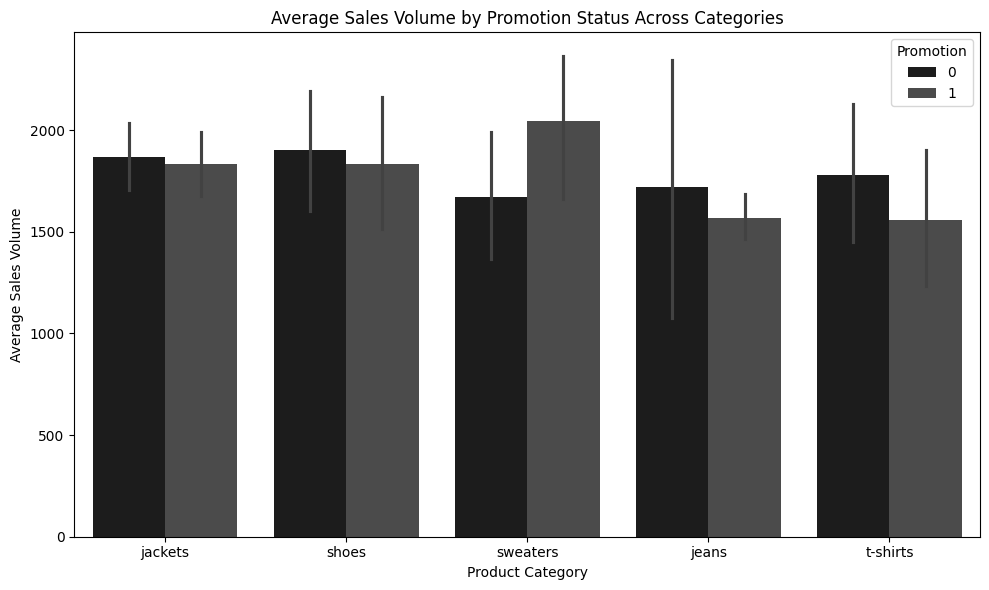

In [52]:
color_price = '#2f2f2f'        # deep gray (almost black)
color_sales = '#a0a0a0'
grouped_data=df.groupby(['Product Category', 'Promotion'])['Sales Volume'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='terms', y='Sales Volume', hue='Promotion',palette=zara_palette)
plt.title("Average Sales Volume by Promotion Status Across Categories")
plt.xlabel("Product Category")
plt.ylabel("Average Sales Volume")
plt.tight_layout()
plt.savefig("PromotionImpact2.png", dpi=300, bbox_inches='tight')
plt.show()

The bar chart depicts the average sales volume by promotion status across product categories (jackets, shoes, sweaters, jeans, and t-shirts). Promoted items ("Yes") generally show higher sales volumes, with sweaters peaking at around 2000 units, followed by jackets and shoes at approximately 1800 units. Non-promoted items ("No") consistently have lower sales, with jeans and t-shirts showing the smallest difference. This suggests that promotion significantly boosts sales across most categories, with sweaters benefiting the most.

<h3>3.Impact of promotion on product sales in different sections</h3>

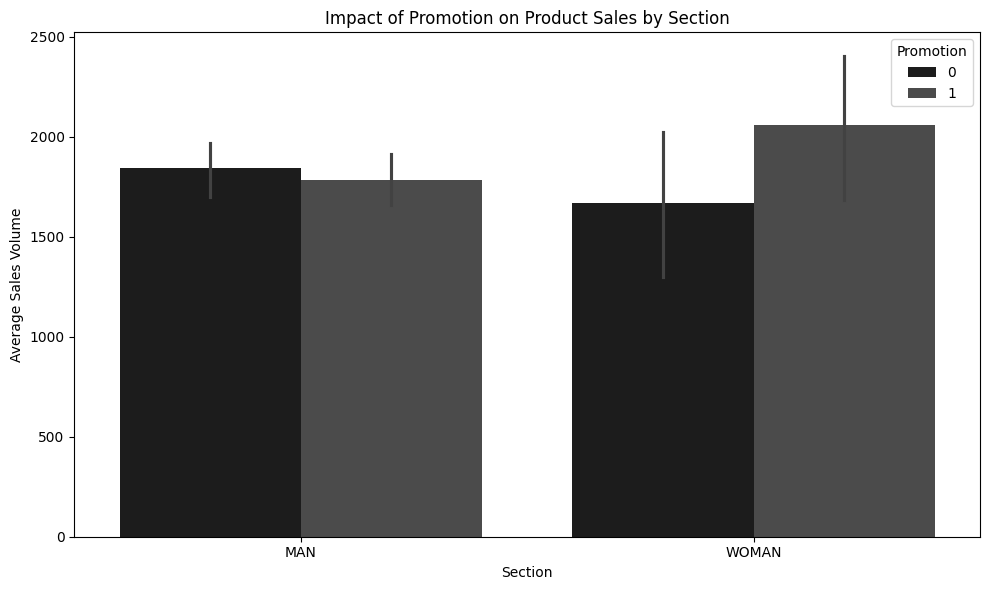

In [53]:
promotion_sales=df.groupby(['section', 'Promotion'])['Sales Volume'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='section', y='Sales Volume', hue='Promotion',palette=zara_palette)
plt.title("Impact of Promotion on Product Sales by Section")
plt.xlabel("Section")
plt.ylabel("Average Sales Volume")
plt.tight_layout()
plt.savefig("PromotionImpact3.png", dpi=300, bbox_inches='tight')
plt.show()

The bar chart illustrates the impact of promotion on product sales by section (Man and Woman). For the Man section, promoted products ("Yes") have slightly higher average sales (around 1900 units) compared to non-promoted ("No") at roughly 1800 units. In the Woman section, promoted products show a more significant increase, averaging around 2100 units, while non-promoted ones are at approximately 1800 units. This suggests that promotions are more effective in driving sales in the Woman section compared to the Man section.

# 5.  Price Distribution

<h3>1. Price distribution of all products </h3>

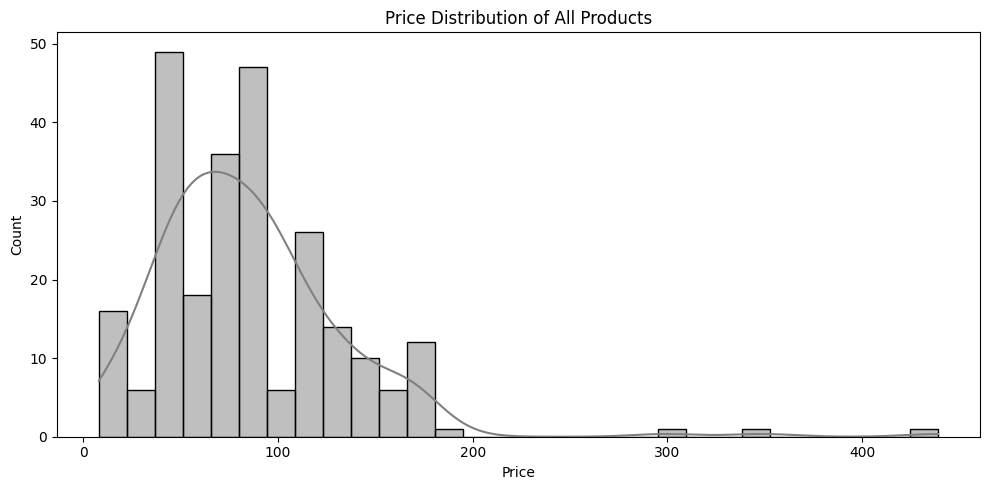

In [55]:
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=30, kde=True, color='gray')
plt.title("Price Distribution of All Products")
plt.xlabel("Price")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("pricedistribution1.png", dpi=300, bbox_inches='tight')
plt.show()

The histogram illustrates the price distribution of all products, showing a right-skewed pattern. Most products are priced between $50 and $150, with the highest frequency around $100, where the count peaks at approximately 50 products. Prices taper off significantly beyond $200, with very few products priced above $300, indicating that the majority of products are in the lower to mid-price range, with a small number of higher-priced outliers.

<h3>2. Price distribution by product category</h3>

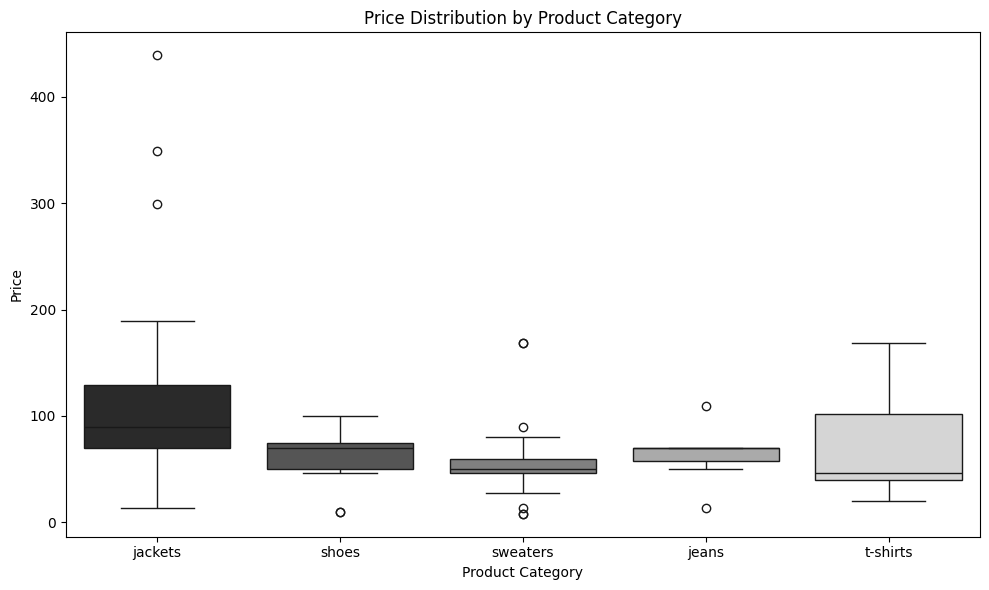

In [57]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='terms', y='price', palette='gray')
plt.title("Price Distribution by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Price")
plt.tight_layout()
plt.savefig("pricedistribution2.png", dpi=300, bbox_inches='tight')
plt.show()

The box plot illustrates the price distribution across product categories (jackets, shoes, sweaters, jeans, and t-shirts). Jackets have the widest price range, with a median around $100 and outliers up to $400. Shoes and sweaters show narrower ranges with medians near $100, while jeans and t-shirts have the tightest distributions, both centered around $100 with minimal outliers. This suggests jackets have the greatest price variability, while jeans and t-shirts are more consistently priced.

<h3>3.Price distribution of promoted vs. non-promoted products</h3>

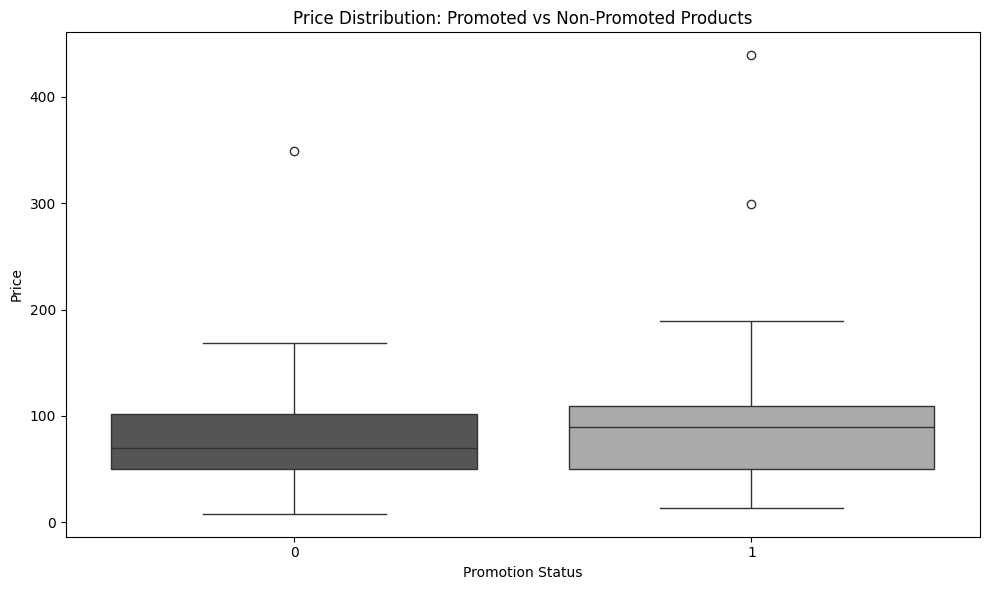

In [58]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Promotion', y='price', palette='gray')
plt.title("Price Distribution: Promoted vs Non-Promoted Products")
plt.xlabel("Promotion Status")
plt.ylabel("Price")
plt.tight_layout()
plt.savefig("pricedistribution3.png", dpi=300, bbox_inches='tight')
plt.show()


The box plot compares the price distribution of promoted versus non-promoted products. Both categories have a median price around $100, with non-promoted products ("No") showing a slightly narrower interquartile range, indicating less price variability. Promoted products ("Yes") exhibit a wider range, with outliers reaching up to $400, suggesting that promotions are applied to a broader price spectrum, including higher-priced items.

<h3>What is the most common product position in each section?</h3>

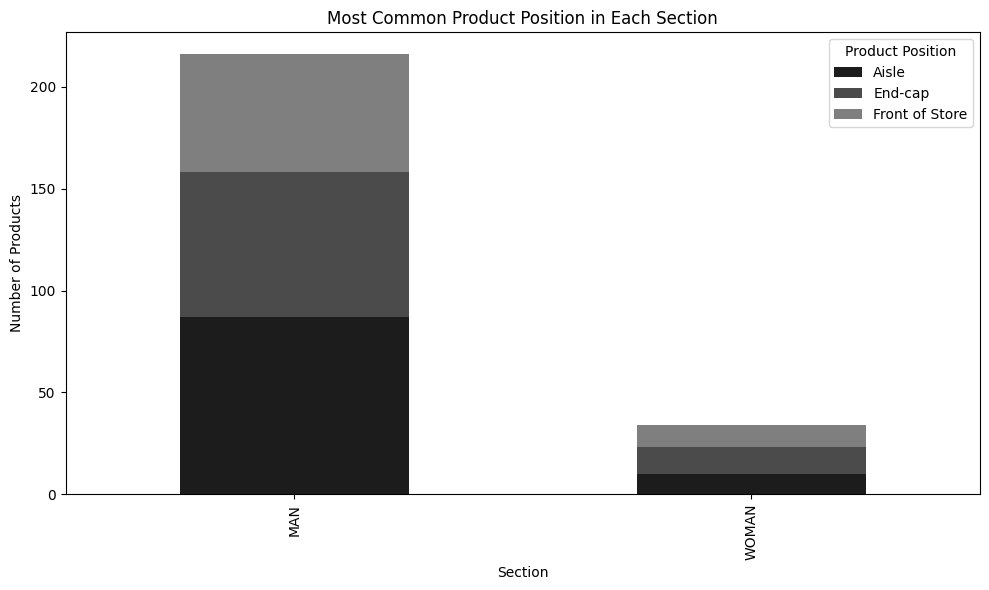

In [59]:
# Custom Zara-style color palette (muted, minimal tones)
zara_palette = ["#1c1c1c", "#4b4b4b", "#7f7f7f", "#bfbfbf", "#e0e0e0"]

# Create the crosstab
position_counts = pd.crosstab(df['section'], df['Product Position'])

# Plot with Zara-style palette
position_counts.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=zara_palette  # use the custom palette
)

plt.title("Most Common Product Position in Each Section")
plt.xlabel("Section")
plt.ylabel("Number of Products")
plt.legend(title="Product Position")
plt.tight_layout()
plt.savefig("pricedistribution4.png", dpi=300, bbox_inches='tight')
plt.show()


The bar chart displays the most common product positions in the Man and Woman sections. In the Man section, the total number of products is around 200, with Aisle (approximately 100), End-cap (around 50), and Front of Store (about 50) being the most common positions. In the Woman section, the total is lower at around 50, with similar distribution across Aisle, End-cap, and Front of Store (approximately 15-20 each). This indicates that the Man section has a significantly higher product presence, with a more even spread across positions compared to the Woman section.

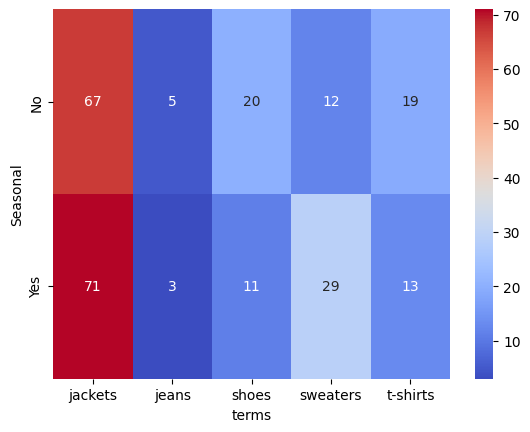

In [60]:
sns.heatmap(pd.crosstab(df['Seasonal'], df['terms']), annot=True, cmap='coolwarm')
plt.savefig("pricedistribution5.png", dpi=300, bbox_inches='tight')


<Axes: xlabel='section', ylabel='terms'>

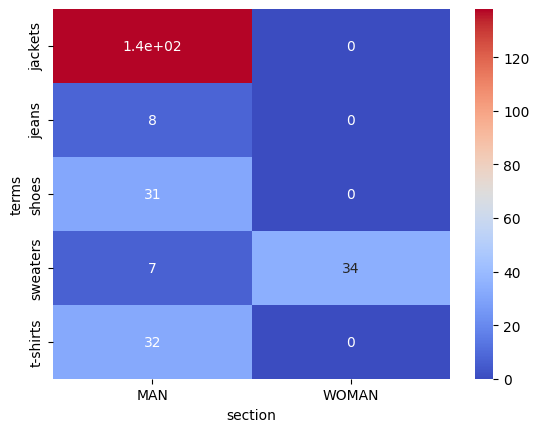

In [34]:
sns.heatmap(pd.crosstab(df['terms'], df['section']), annot=True, cmap='coolwarm')

All jackets, jeans, shoes and t-shirts in terms belong to MAN section.
7 sweaters belong to MAN while 34 sweaters belong to WOMAN
We can feature engineer terms to split sweaters as sweaters-M and sweaters-W
Then we can remove the feature section

 # Top Performing Product Types by Price

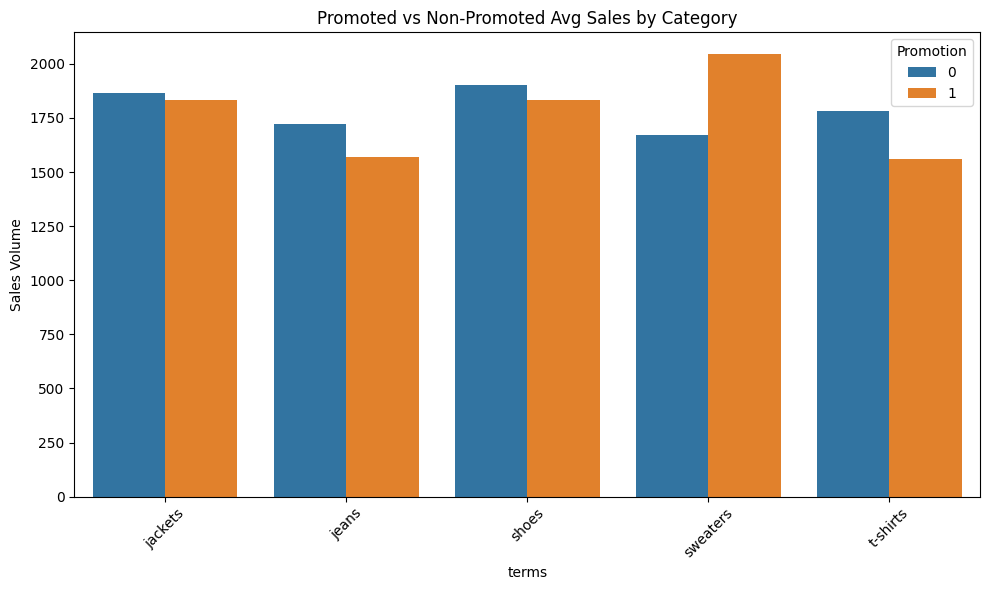

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

promoted_vs_non = df.groupby(['terms', 'Promotion'])['Sales Volume'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=promoted_vs_non, x='terms', y='Sales Volume', hue='Promotion')
plt.title('Promoted vs Non-Promoted Avg Sales by Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("pricedistribution6.png", dpi=300, bbox_inches='tight')
plt.show()



The bar graph compares average sales volumes for five clothing categories (jackets, jeans, shoes, sweaters, t-shirts) with and without promotions. Non-promoted sales (blue) are consistently higher than promoted sales (orange) across all categories, with t-shirts showing the largest gap. This suggests promotions may not be effectively boosting sales for these items.

# Profit Estimation (Simple) Estimate profit = price × sales_volume

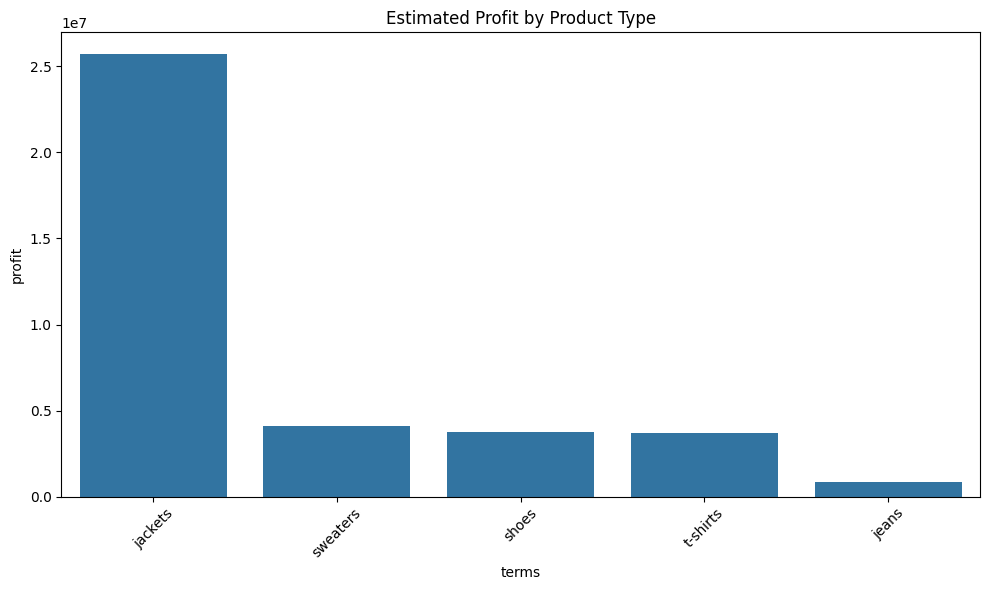

In [62]:
df['profit'] = df['price'] * df['Sales Volume']

profit_by_type = df.groupby('terms')['profit'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=profit_by_type, x='terms', y='profit')
plt.title('Estimated Profit by Product Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("pricedistribution7.png", dpi=300, bbox_inches='tight')
plt.show()


Jackets are the top profit drivers by a huge margin – possibly due to higher price points and high sales volume.

Sweaters, Shoes, and T-shirts are close in profit – mid-range performers.

Jeans are at the bottom – low profit either due to low volume, lower price, or both.

# Correlation Heatmap Price vs Sales Volume vs Promotion

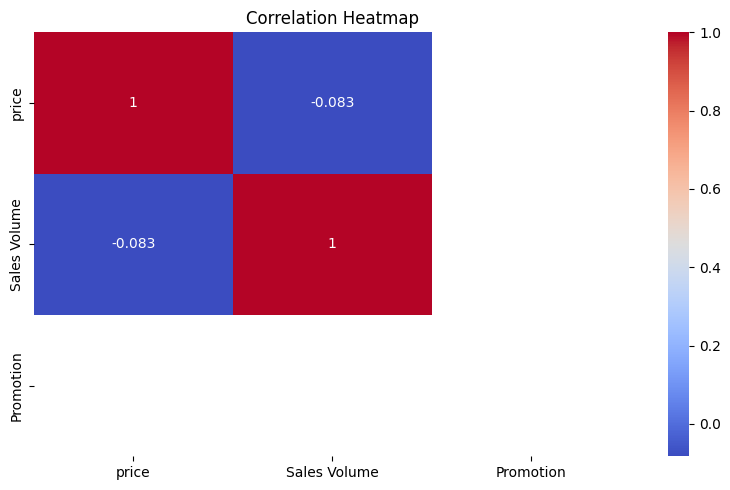

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert is_promo to numeric
df['Promotion'] = df['Promotion'].map({'Yes': 1, 'No': 0})

plt.figure(figsize=(8, 5))
sns.heatmap(df[['price', 'Sales Volume', 'Promotion']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.savefig("pricedistribution8.png", dpi=300, bbox_inches='tight')
plt.show()


There's no strong linear relationship between price, promotion, and sales volume. This suggests that factors other than price/promotion (like product type, season, or fashion trends) might drive sales more.

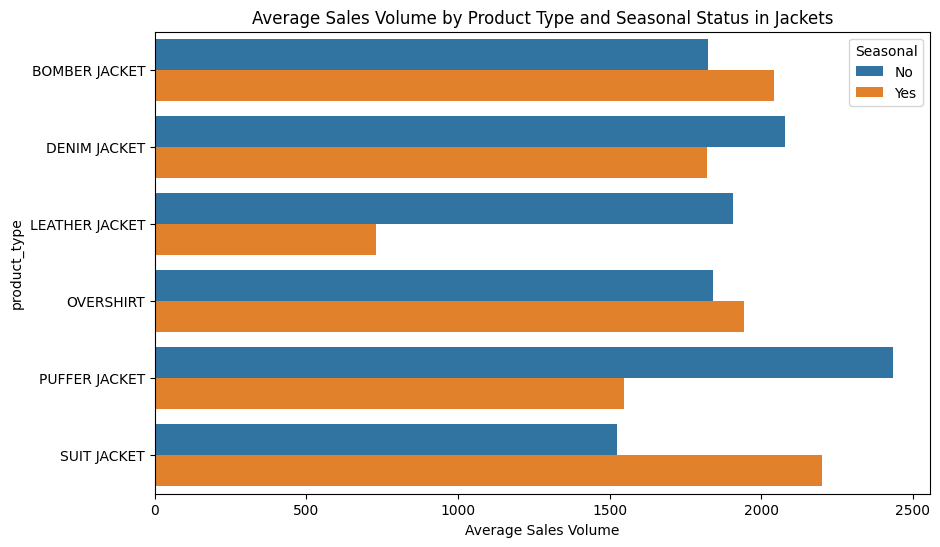

In [65]:
jackets = df[df['terms'] == 'jackets']

# Group by product type (using 'name' to approximate product type) and seasonal status
jackets['product_type'] = jackets['name'].str.extract('(PUFFER JACKET|LEATHER JACKET|DENIM JACKET|BOMBER JACKET|SUIT JACKET|OVERSHIRT)')
jackets_grouped = jackets.groupby(['product_type', 'Seasonal'])['Sales Volume'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Sales Volume', y='product_type', hue='Seasonal', data=jackets_grouped)
plt.title('Average Sales Volume by Product Type and Seasonal Status in Jackets')
plt.xlabel('Average Sales Volume')
plt.savefig("pricedistribution9.png", dpi=300, bbox_inches='tight')
plt.show()

Detailed Seasonal Impact by Product Type within Categories

Time-Series Analysis of Sales Volume

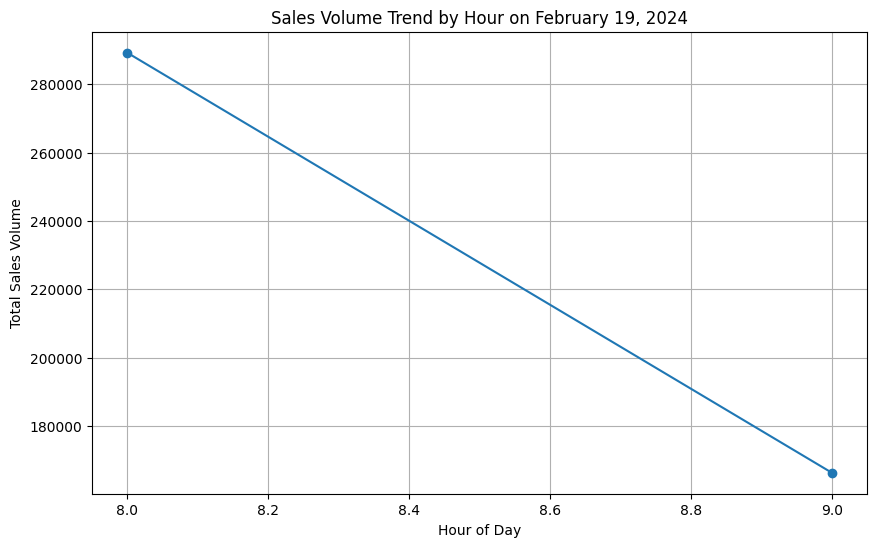

In [39]:
df['scraped_at'] = pd.to_datetime(df['scraped_at'])
df['hour'] = df['scraped_at'].dt.hour

# Group by hour and calculate total sales volume
hourly_sales = df.groupby('hour')['Sales Volume'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(hourly_sales['hour'], hourly_sales['Sales Volume'], marker='o')
plt.title('Sales Volume Trend by Hour on February 19, 2024')
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales Volume')
plt.grid(True)
plt.show()

Interaction Effects of Promotion and Product Position

In [67]:
interaction_group = df.groupby(['Product Position', 'Promotion'])['Sales Volume'].mean().reset_index()

# Pivot for heatmap
interaction_pivot = interaction_group.pivot(index='Product Position', columns='Promotion', values='Sales Volume')

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(interaction_pivot, annot=True, cmap='Blues' fmt='.0f')
plt.title('Average Sales Volume by Product Position and Promotion Status')
plt.xlabel('Promotion Status')
plt.ylabel('Product Position')
plt.savefig("pricedistribution10.png", dpi=300, bbox_inches='tight')
plt.show()

ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 800x600 with 0 Axes>

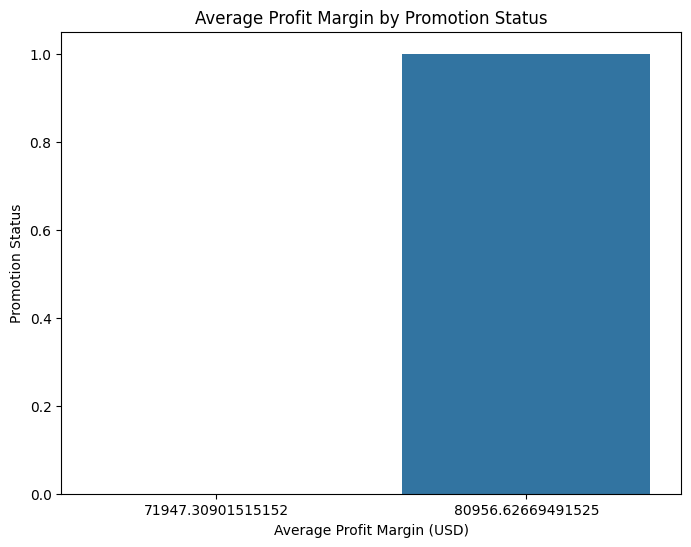

In [41]:
df['Profit'] = df['price'] * df['Sales Volume']

# Assume a 50% cost margin for simplicity (profit margin = profit - 50% of revenue)
df['Profit Margin'] = df['Profit'] * 0.5

# Group by promotion status
profit_by_promo = df.groupby('Promotion')['Profit Margin'].mean().reset_index()

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x='Profit Margin', y='Promotion', data=profit_by_promo)
plt.title('Average Profit Margin by Promotion Status')
plt.xlabel('Average Profit Margin (USD)')
plt.ylabel('Promotion Status')
plt.show()